C:\Users\hp\anaconda3\envs\dlc_py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Epoch 1/10
625/625 [==============================] - 40s 60ms/step - loss: 1.6762 - accuracy: 0.3819 - val_loss: 1.4570 - val_accuracy: 0.4746
Epoch 2/10
625/625 [==============================] - 37s 59ms/step - loss: 1.3028 - accuracy: 0.5306 - val_loss: 1.2663 - val_accuracy: 0.5495
Epoch 3/10
625/625 [==============================] - 37s 60ms/step - loss: 1.1457 - accuracy: 0.5936 - val_loss: 1.1337 - val_accuracy: 0.6059
Epoch 4/10
625/625 [==============================] - 38s 60ms/step - loss: 1.0359 - accuracy: 0.6362 - val_loss: 1.0638 - val_accuracy: 0.6319
Epoch 5/10
625/625 [==============================] - 36s 58ms/step - loss: 0.9644 - accuracy: 0.6643 - val_loss: 0.9969 - val_accuracy: 0.6535
Epoch 6/10
625/625 [==============================] - 38s 61ms/step - loss: 0.8893 - accuracy: 0.6885 - val_loss: 0.9435 - val_accuracy: 0.6715
Epoch 7/10
625/625 [==============================] - 38s 61ms/step - loss: 0.8461 - accuracy: 0.7043 - val_loss: 0.9205 - val_accuracy:

Enter an index (0 to 9999) for test image:  70


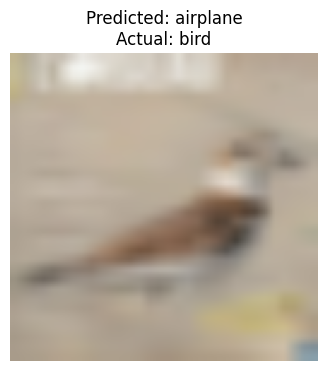

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Take user input for index
try:
    index = int(input("Enter an index (0 to 9999) for test image: "))
except ValueError:
    print("Invalid input. Using index 0 by default.")
    index = 0

if index < 0 or index >= len(x_test):
    print("Invalid index. Using index 0 by default.")
    index = 0

# Get test image and true label
test_image = x_test[index]
true_label = np.argmax(y_test[index])

# Predict using the trained model
prediction = model.predict(np.expand_dims(test_image, axis=0), verbose=0)
predicted_label = np.argmax(prediction)

# Display image with prediction
plt.figure(figsize=(4, 4))
resized_image = tf.image.resize(test_image, [128, 128])
plt.imshow(resized_image)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}")
plt.show()